   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None
Accuracy of Decision Tree: 1.0000

Classification Report:
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00

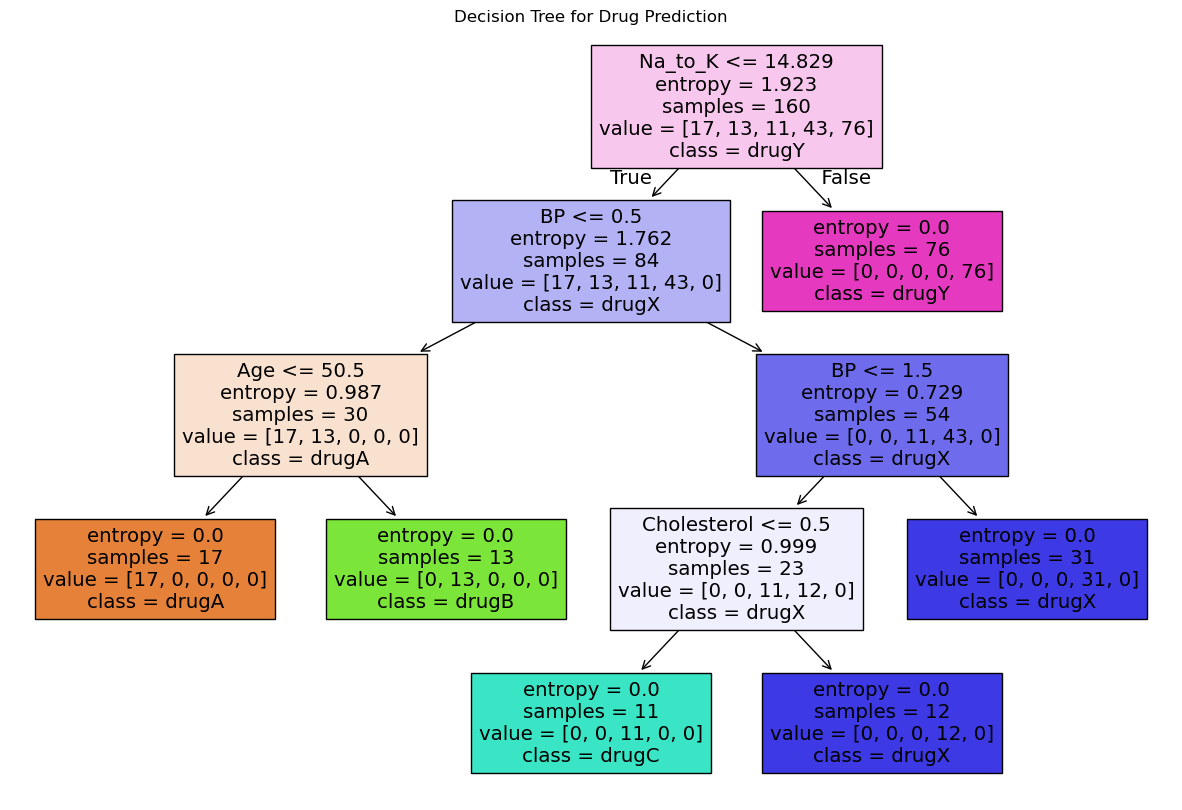

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("drug.csv")

# Display initial info
print(df.head())
print(df.info())

# Encode categorical variables
le_sex = LabelEncoder()
le_bp = LabelEncoder()
le_chol = LabelEncoder()

df["Sex"] = le_sex.fit_transform(df["Sex"])
df["BP"] = le_bp.fit_transform(df["BP"])
df["Cholesterol"] = le_chol.fit_transform(df["Cholesterol"])

# Features and target
X = df[["Age", "Sex", "BP", "Cholesterol", "Na_to_K"]]
y = df["Drug"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
model = DecisionTreeClassifier(criterion="entropy", random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# optional
plt.figure(figsize=(15,10))
tree.plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.title("Decision Tree for Drug Prediction")
plt.show()
